#**BigMart Sales Prediction**#

##**Objectives**##

- Loading the data

- Preprocessing the data

- EDA & Analysis

- Develop prediction models

- Evaluataion

- Predictions on test set

- Save models


# **Problem Statement**




##The problem is to build a predictive model that can accurately forecast the sales of each product at a particular store. So by understanding the key properties of both the products and the stores that influence sales, BigMart aims to identify strategies to increase sales and optimize their operations.

#**About Dataset**

**Item_Identifier**: A unique identifier for each item.

**Item_Weight**: The weight of the item.

**Item_Fat_Content**: Indicates the fat content of the item, such as "Low Fat" or "Regular."

**Item_Visibility**: The visibility of the item in the store.

**Item_Type**: The category or type of the item, such as "Snack Foods," "Dairy," or "Others."
**Item_MRP**: The maximum retail price (MRP) of the item(he selling price of the item to customers)

**Outlet_Identifier**: A unique identifier for each store or outlet.

**Outlet_Establishment_Year**: The year when the store was established.

**Outlet_Size**: Indicates the size of the store

**Outlet_Location_Type**: Indicates the location type of the store, such as "Tier 1," "Tier 2," or "Tier 3."

 - ***Tier 1*** -->  Typically refers to locations in highly urbanized areas or major cities with higher population density and greater economic development

 -***Tier 2*** -->  Refers to locations in moderately urbanized areas or secondary cities with a moderate population density and economic development.

 -***Tier 3***-->  Refers to locations in less urbanized or rural areas with lower population density and relatively lower economic development compared to Tier 1 and Tier 2 locations.

**Outlet_Type**: The type of outlet, such as "Supermarket Type1" or "Grocery Store."

MRP is the maximum price at which a product can be sold,
 while Item_Outlet_Sales represents the actual revenue generated from selling the item in a specific outlet. The MRP is a fixed reference price,
  while Item_Outlet_Sales can vary based on factors influencing sales performance.

#**Hypothesis Generation :**

###**we can consider various factors that may affect sales. Some of them are:**
1- **Store Location**: Stores located in densely populated areas may have higher sales compared to stores in less populated or remote areas.

2- **Store Size**: Larger stores may have more shelf space and a wider variety of products, leading to higher sales.

3- **Product Visibility**: Products placed at eye-level or in prominent store locations may attract more customer attention and result in higher sales.

4- **Product Pricing**: Products with lower prices or those offered at discounts may have higher sales compared to similar products with higher prices.

5- **Product Promotion**: Products that are actively promoted through advertisements, in-store displays, or special offers may experience increased sales.

6- **Product Quality**: Products with better quality or higher customer ratings may have higher sales compared to products with lower quality.

7- **Competition**: Stores located in close proximity to competitors may experience lower sales compared to stores with less competition.



#**Loading Packages**

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV



#**loading Datasets**

In [2]:
uploaded=files.upload()

Saving Train.csv to Train (4).csv


In [3]:
train_df=pd.read_csv("Train.csv")

#**Data Cleaning and Preprocessing**

In [4]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train_df.shape

(8523, 12)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#Summerizing and describing data
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##**Handeling Missing Values**

In [8]:
train_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<Axes: >

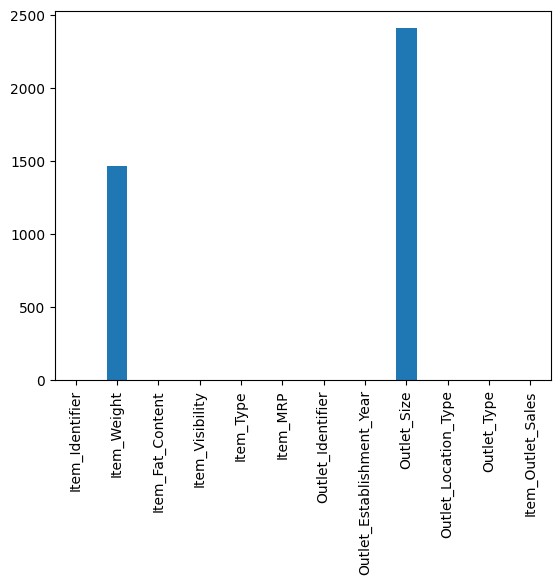

In [9]:
train_df.isna().sum().plot(kind='bar')

In [10]:
#indicating percentage of missing data in the entire dataset
train_df.isna().sum()/len(train_df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

So we have 2 variables that have missing values, we will handle them by dropping them from entire dataset or imputation . But, due to the high percentage of missing values in the 2 columns we will impute them.

- Item_Weight --> numeric variable that we could do imputations by the mean or median of the overall weights of the product.
- Outlet_Size --> Categorical variable that we could impute it with the most frequent size in outlet sizes

In [11]:
train_df['Item_Weight'].median()

12.6

In [12]:
train_df['Item_Weight'].mean()

12.857645184135976

In [13]:
###impute Item_weight with mean or median because its distribution is symmetric
train_df['Item_Weight'].replace(np.nan,train_df['Item_Weight'].median(),inplace=True)
train_df['Item_Weight'].isna().sum()/len(train_df)*100

0.0

<Axes: >

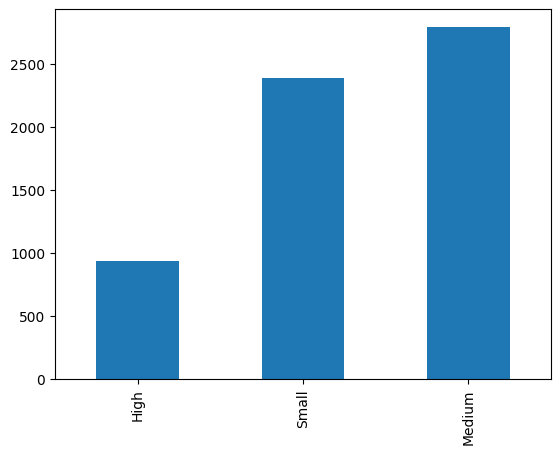

In [14]:
train_df['Outlet_Size'].value_counts().sort_values().plot(kind='bar')

In [15]:
mode_imp=train_df['Outlet_Size'].mode().values[0]
print(mode_imp)

Medium


In [16]:
###impute Outlet_Size with most frequent value(Mode)
train_df['Outlet_Size'].replace(np.nan,mode_imp,inplace=True)
train_df['Outlet_Size'].isna().sum()/len(train_df)*100

0.0

In [17]:
train_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Also we notice that in Item_Visibility column has min value visibility = 0 with count of 526 times, Which doesn't make sens so when a product being sold in the store, the visibility couldn't be zero**

so let's consider it as a missing value and replace it with avrg visibility of the product

In [18]:
train_df[train_df['Item_Visibility']==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,12.600,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8484,DRJ49,6.865,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736
8486,FDR20,20.000,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,Medium,Tier 3,Grocery Store,45.2744
8494,NCI54,15.200,Low Fat,0.0,Household,110.4912,OUT017,2007,Medium,Tier 2,Supermarket Type1,1637.8680


In [19]:
#we want to know how much is item visibility = 0 in the dataset
value_to_count=0
(train_df['Item_Visibility']== value_to_count).sum()

526

median 0.053930934
mean 0.06613202877895108


<Axes: xlabel='Item_Visibility', ylabel='Count'>

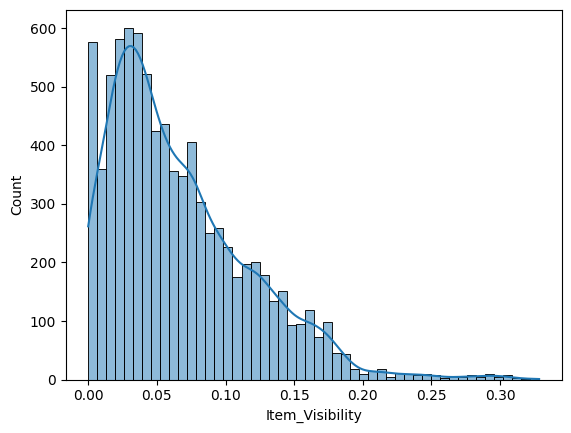

In [20]:
med_vis=train_df['Item_Visibility'].median()
mean_vis=train_df['Item_Visibility'].mean()

print('median', med_vis)
print("mean", mean_vis)
sns.histplot(x=train_df['Item_Visibility'],kde=True, data=train_df)

In [21]:
train_df['Item_Visibility']

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

In [22]:
#we will impute them with median because the skeweness of distribution
rounded_median = round(med_vis, 7)
train_df['Item_Visibility'] = train_df['Item_Visibility'].replace(0, rounded_median)
#Check
train_df[train_df['Item_Visibility']==0]
value_to_count=0
(train_df['Item_Visibility']== value_to_count).sum()


0

**modify Item_Fat_Content Categories**

In [23]:
train_df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [24]:
train_df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
train_df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [25]:
train_df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [26]:
train_df['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

##**Handling Duplicate records**

In [27]:
train_df.duplicated().sum()

0

##**Handeling Outliars**
From Box plots it seems that item_visibility has a lot of outliers so there are a lot of techniques to deal with them

1-**remove them :** if they are error or meaningless data

2- **transform data:** Transformations like logarithmic or square root transformations can make the data less sensitive to outliers. This can help normalize the distribution and reduce the impact of outliers on statistical analyses.

3- **Winsorizing**: replace extreme values with the nearest less extreme value. For example, you could replace values above a certain threshold with the maximum value below that threshold and vice versa.

4- **Use Robust Models:** In machine learning, some algorithms are less sensitive to outliers. Random Forests and Support Vector Machines are examples of models that can handle outliers better than linear models.


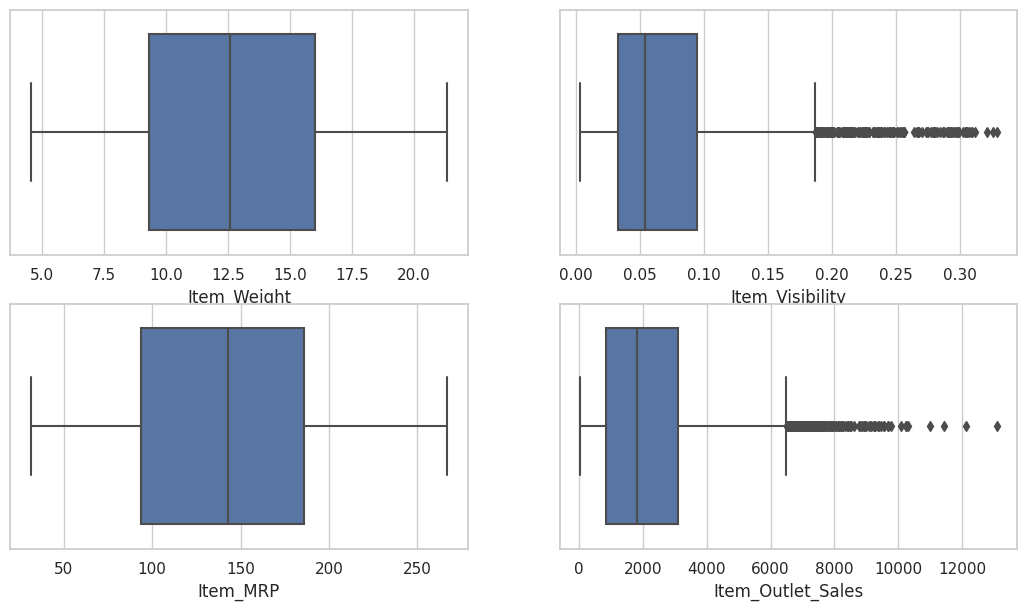

In [28]:
sns.set(style="whitegrid")
fig,axs = plt.subplots(2,2,figsize = (13,7))
sns.boxplot(data=train_df, x="Item_Weight", ax=axs[0,0 ])
sns.boxplot(data=train_df,x="Item_Visibility", ax=axs[0, 1])
sns.boxplot(data=train_df, x="Item_MRP",  ax=axs[1, 0])
sns.boxplot(data=train_df, x="Item_Outlet_Sales", ax=axs[1, 1])

plt.show()

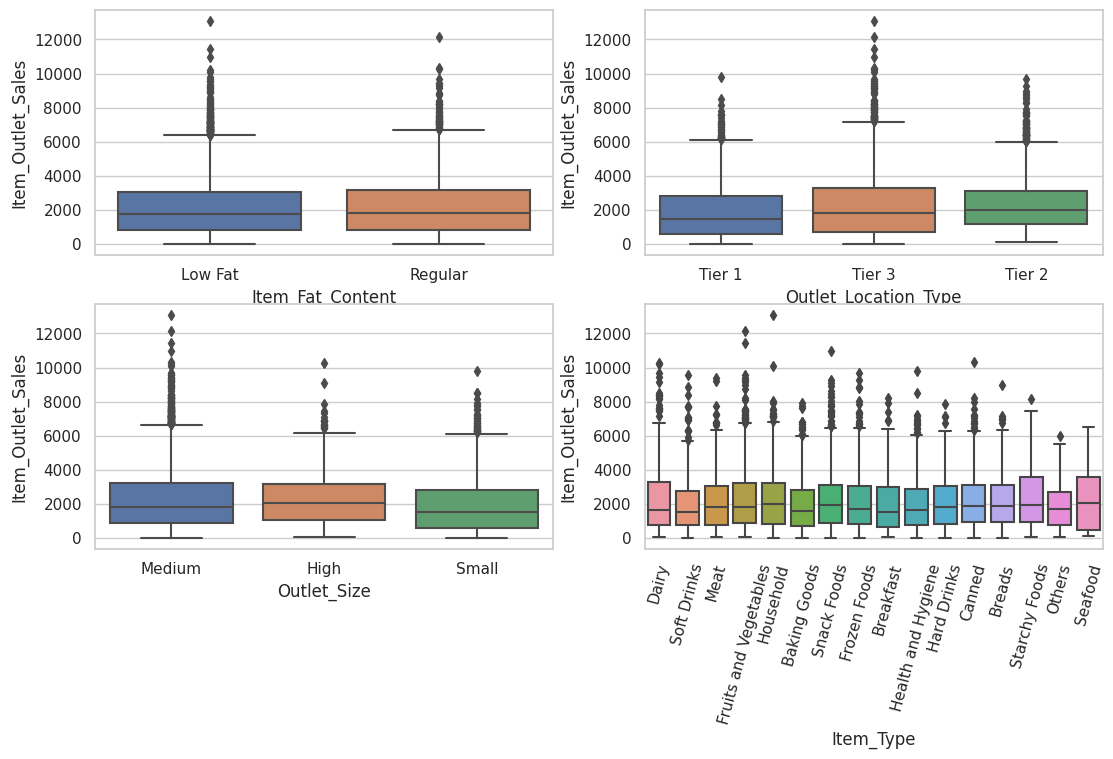

In [29]:
sns.set(style="whitegrid")
fig,axs = plt.subplots(2,2,figsize = (13,7))
sns.boxplot(data=train_df, x="Item_Fat_Content",y='Item_Outlet_Sales', ax=axs[0,0 ])
sns.boxplot(data=train_df,x="Outlet_Location_Type",y='Item_Outlet_Sales',ax=axs[0, 1])
sns.boxplot(data=train_df, x="Outlet_Size",y="Item_Outlet_Sales", ax=axs[1, 0])
sns.boxplot(data=train_df, x="Item_Type",y='Item_Outlet_Sales',ax=axs[1, 1])
plt.xticks(rotation=75)


plt.show()

**Identifying outliers using IQR in Item_Visibility**


In [30]:
q1=train_df['Item_Visibility'].quantile(0.25)
q3=train_df['Item_Visibility'].quantile(0.75)
iqr=q3-q1
#cut_off = iqr * 1.5
out=train_df[((train_df['Item_Visibility']<(q1-1.5*iqr)) | (train_df['Item_Visibility']>(q3+1.5*iqr)))]
print('Identified outliers: %d' % len(out))
out

Identified outliers: 173


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
49,FDS02,12.60,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
65,FDC46,17.70,Low Fat,0.195068,Snack Foods,185.4266,OUT010,1998,Medium,Tier 3,Grocery Store,184.4266
83,NCL18,12.60,Low Fat,0.293418,Household,194.6136,OUT019,1985,Small,Tier 1,Grocery Store,583.2408
108,DRE60,12.60,Low Fat,0.278974,Soft Drinks,225.3720,OUT019,1985,Small,Tier 1,Grocery Store,679.1160
174,FDI32,17.70,Low Fat,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,Medium,Tier 3,Grocery Store,345.5502
...,...,...,...,...,...,...,...,...,...,...,...,...
8292,FDF56,12.60,Regular,0.209163,Fruits and Vegetables,179.1976,OUT019,1985,Small,Tier 1,Grocery Store,543.2928
8345,FDY28,12.60,Regular,0.266397,Frozen Foods,215.6218,OUT019,1985,Small,Tier 1,Grocery Store,641.1654
8371,DRA59,8.27,Regular,0.214125,Soft Drinks,183.9924,OUT010,1998,Medium,Tier 3,Grocery Store,185.0924
8432,FDI16,14.00,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,Medium,Tier 3,Grocery Store,159.7920


In [31]:
#Removeoutliars
'''train_df = train_df[~((train_df['Item_Visibility'] < (q1 - 1.5 * iqr)) | (train_df['Item_Visibility'] > (q3 + 1.5 * iqr)))]
train_df'''

"train_df = train_df[~((train_df['Item_Visibility'] < (q1 - 1.5 * iqr)) | (train_df['Item_Visibility'] > (q3 + 1.5 * iqr)))]\ntrain_df"

#**EDA and Analysis**

##We will take alook on categorical data to see most frequent values##
1-  snack foods & Fruits and vegtables are most frequent types

2-  most products is low fat contents

3- most of the products are sold in meduim outlet size

4- most outlets ar in teir 3

5- most outlet type is supermarket type 1

6- most outlets were established in year 1985

In [32]:
train_df.select_dtypes(include=['object'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


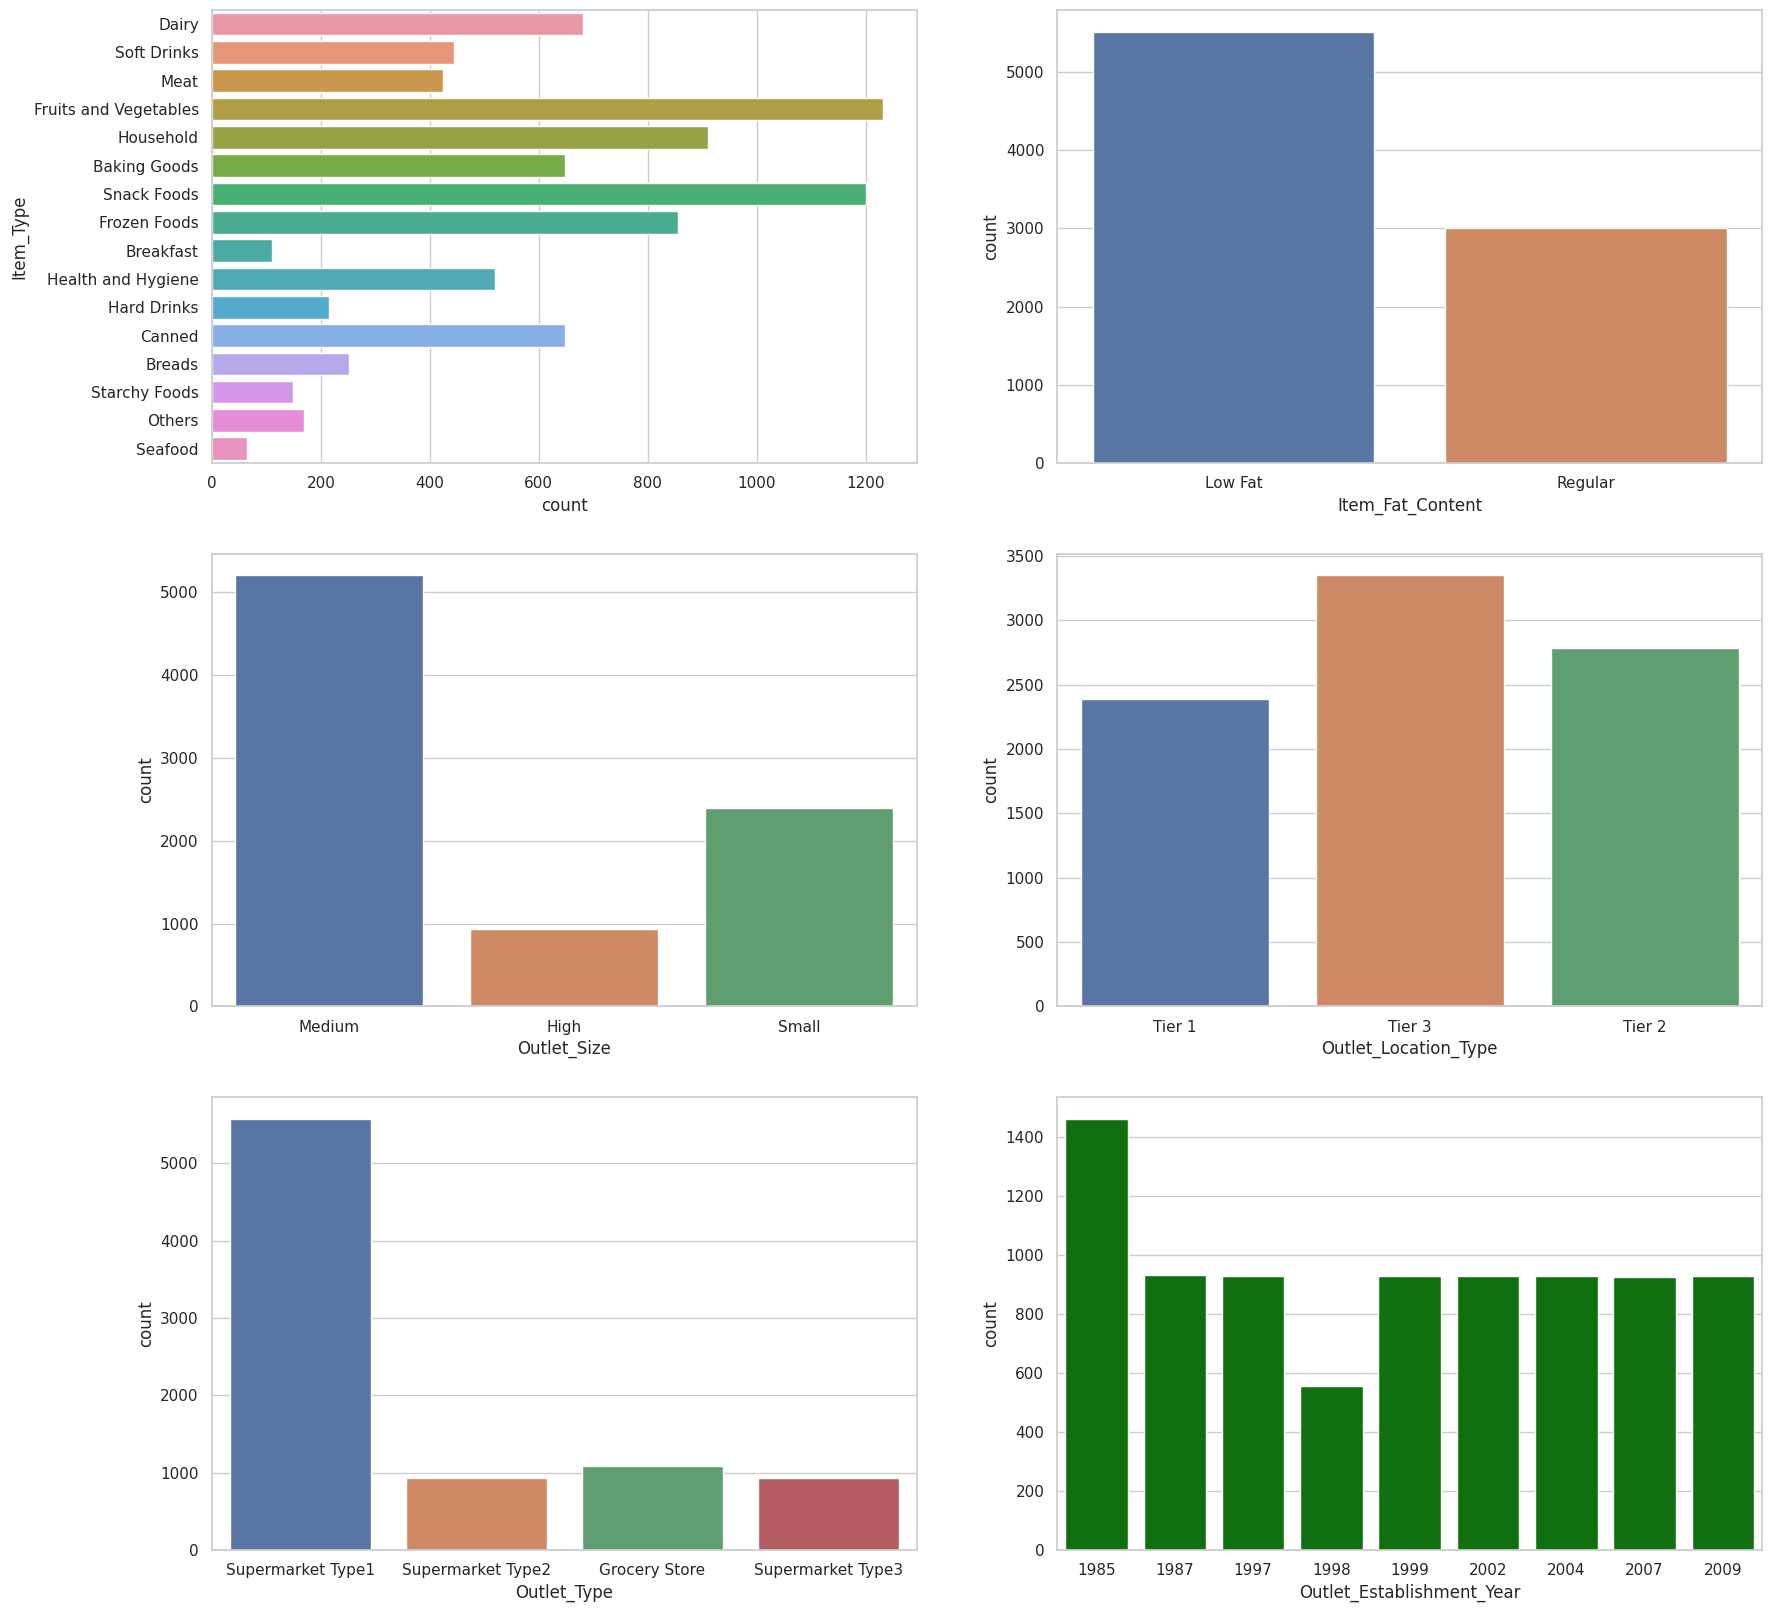

In [33]:
sns.set(style="whitegrid")
fig,axs = plt.subplots(3,2,figsize = (20,20))
sns.countplot(data=train_df, y="Item_Type", ax=axs[0,0 ])
sns.countplot(data=train_df,x="Item_Fat_Content", ax=axs[0, 1])
sns.countplot(data=train_df, x="Outlet_Size", ax=axs[1, 0])
sns.countplot(data=train_df, x="Outlet_Location_Type", ax=axs[1, 1])
sns.countplot(data=train_df, x="Outlet_Type",  ax=axs[2, 0])
sns.countplot(data=train_df, x="Outlet_Establishment_Year", color="green", ax=axs[2, 1])

plt.show()




In [34]:
train_df.select_dtypes(include=['number'])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.053931,182.0950,1998,732.3800
4,8.930,0.053931,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


##**in neumeric columns**
the distributions are not normal and there is a skeweness in item visibility so we should choose a suitable transformation

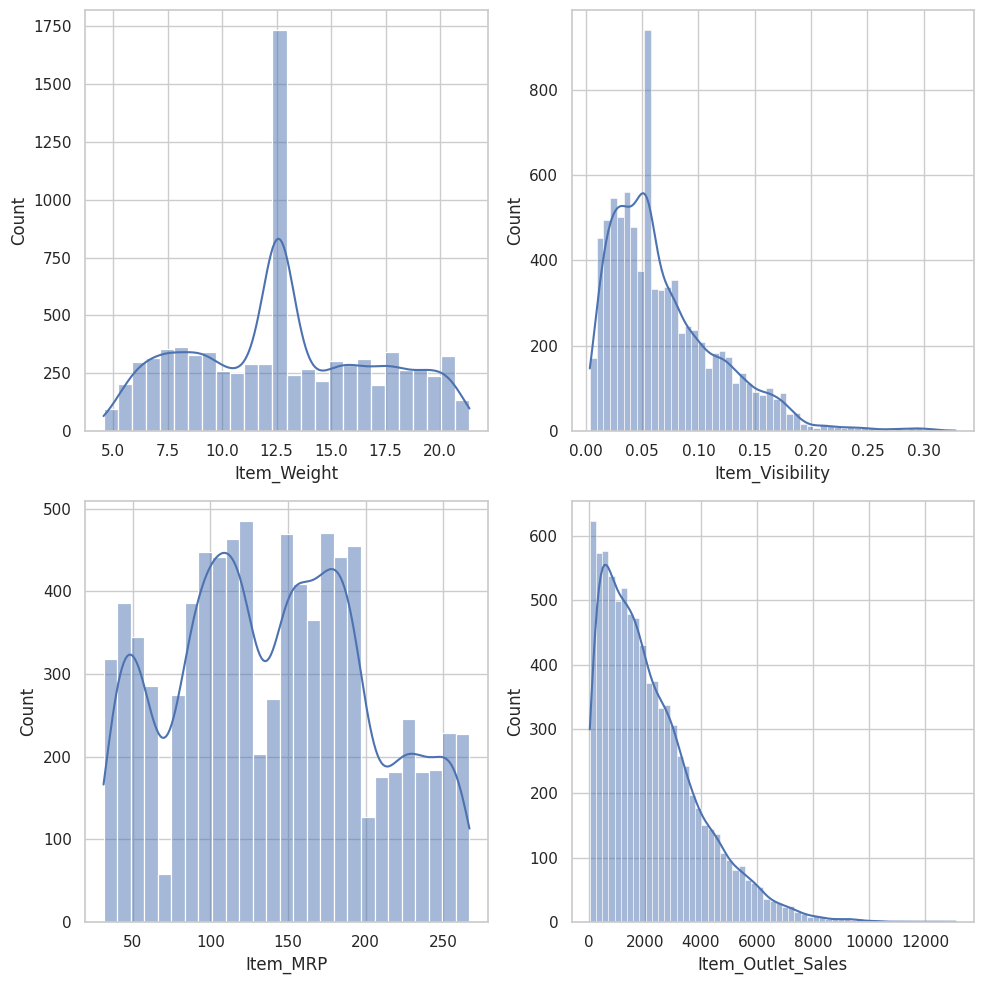

In [35]:
sns.set(style="whitegrid")
fig,axs = plt.subplots(2,2, figsize = (10,10))
sns.histplot(data=train_df, x="Item_Weight", kde=True, ax=axs[0, 0])
sns.histplot(data=train_df, x="Item_Visibility", kde=True, ax=axs[0, 1])
sns.histplot(data=train_df, x="Item_MRP", kde=True, ax=axs[1, 0])
sns.histplot(data=train_df, x="Item_Outlet_Sales", kde=True, ax=axs[1, 1])

fig.tight_layout()

There is a moderate positive corrolation between product price and sales, when the product price is increasing the sales increased

Also it seems that low visible products lead to higher sales and vice versa

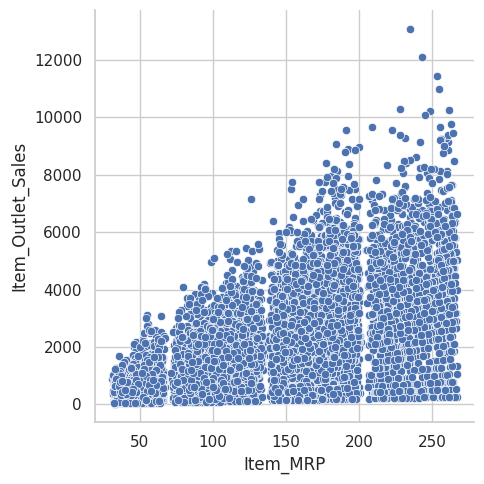

In [36]:
sns.relplot(x='Item_MRP',
           y='Item_Outlet_Sales',
           data=train_df,
            kind='scatter')
plt.show()

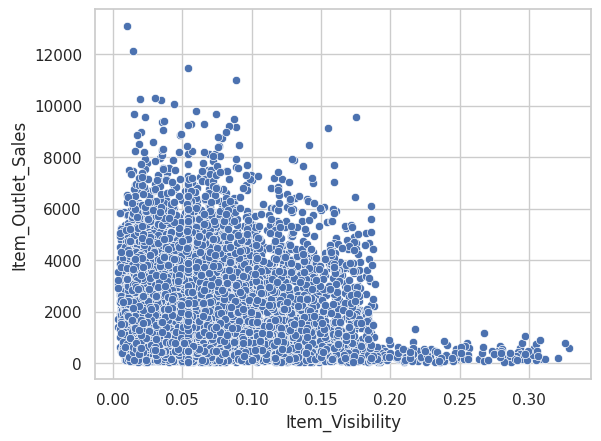

In [37]:
sns.scatterplot(x='Item_Visibility',
           y='Item_Outlet_Sales',
           data=train_df)
plt.show()

<ipython-input-38-2aed4b9ade2b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df.corr()


<Axes: >

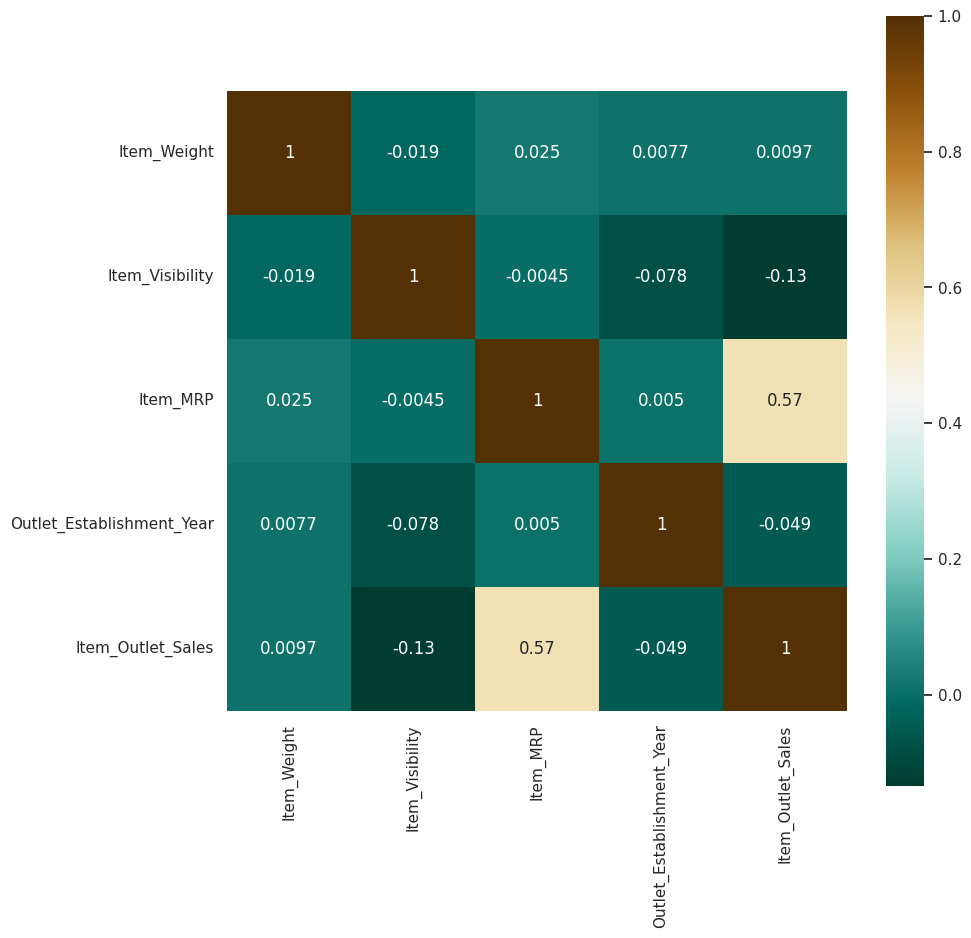

In [38]:
corr = train_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,annot=True,cmap='BrBG_r')

**let's get more info**

1- it seems that outlet_Location_type tier 2,3 sales products more than tier 1

2-supermarket type 3 achieve sales higher than the rest of types



<Figure size 2000x2000 with 0 Axes>

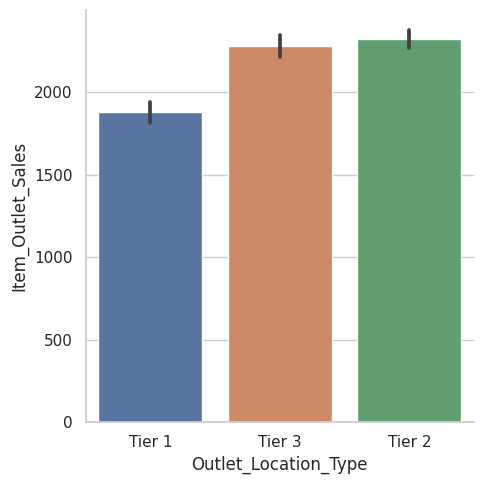

In [39]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,20))
sns.catplot(x='Outlet_Location_Type',
              y='Item_Outlet_Sales',
              data=train_df,
            kind='bar')
plt.show()

<Figure size 3000x3000 with 0 Axes>

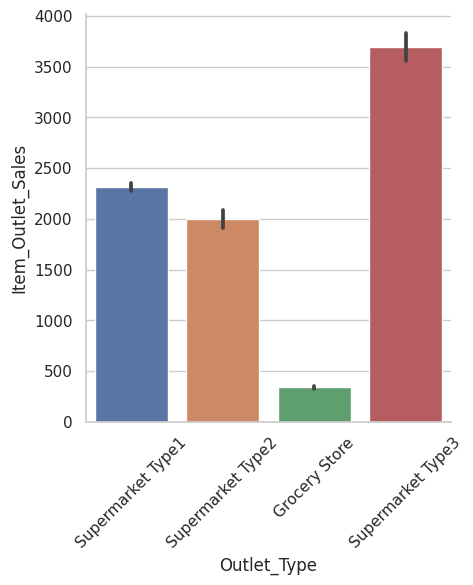

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(30,30))
sns.catplot(x='Outlet_Type',
              y='Item_Outlet_Sales',
              data=train_df,
            kind='bar')
plt.xticks(rotation=45)

plt.show()

#Feature Engineering

In [41]:
train_df['Outlet_Age']=2023- train_df['Outlet_Establishment_Year']
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,25
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,36


<Figure size 3000x3000 with 0 Axes>

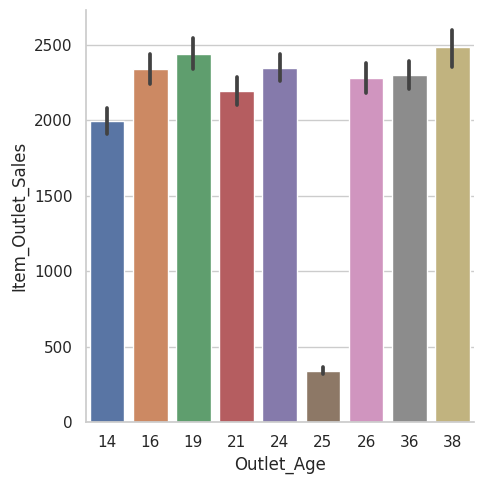

In [42]:
sns.set(style="whitegrid")
plt.figure(figsize=(30,30))
sns.catplot(x='Outlet_Age',
              y='Item_Outlet_Sales',
              data=train_df,
            kind='bar')
plt.show()

In [43]:
train_df['Outlet_Age'].value_counts()

38    1463
36     932
24     930
26     930
19     930
21     929
14     928
16     926
25     555
Name: Outlet_Age, dtype: int64

In [44]:
train_df = train_df.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'])
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,14
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,25
4,8.93,Low Fat,0.053931,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,36


In [45]:
train_df.corr()

<ipython-input-45-a7a80d20a44e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age
Item_Weight,1.000000,-0.018766,0.024951,0.009693,-0.007739
Item_Visibility,-0.018766,1.000000,-0.004531,-0.134095,0.078271
Item_MRP,0.024951,-0.004531,1.000000,0.567574,-0.005020
Item_Outlet_Sales,0.009693,-0.134095,0.567574,1.000000,0.049135
Outlet_Age,-0.007739,0.078271,-0.005020,0.049135,1.000000


#**Encoding Data using Label Encoding and One Hot Encoding**#

In [46]:

enc = OneHotEncoder(sparse=False)
# Passing encoded columns
enc_col = pd.DataFrame(enc.fit_transform(train_df[['Item_Type']]))
enc_col.columns=enc.get_feature_names_out(['Item_Type'])
train_df=train_df.drop(columns=['Item_Type'])
# Merge with main
train_df =pd.concat([train_df,enc_col], axis=1)
train_df


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.300,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,24,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.920,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,14,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,17.500,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,24,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,19.200,Regular,0.053931,182.0950,Medium,Tier 3,Grocery Store,732.3800,25,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.930,Low Fat,0.053931,53.8614,High,Tier 3,Supermarket Type1,994.7052,36,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,214.5218,High,Tier 3,Supermarket Type1,2778.3834,36,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8519,8.380,Regular,0.046982,108.1570,Medium,Tier 2,Supermarket Type1,549.2850,21,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8520,10.600,Low Fat,0.035186,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,19,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8521,7.210,Regular,0.145221,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,14,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [47]:

labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
train_df['Item_Fat_Content'] = labelencoder.fit_transform(train_df['Item_Fat_Content'])
train_df['Outlet_Size'] = labelencoder.fit_transform(train_df['Outlet_Size'])
train_df['Outlet_Type'] = labelencoder.fit_transform(train_df['Outlet_Type'])
train_df['Outlet_Location_Type'] = labelencoder.fit_transform(train_df['Outlet_Location_Type'])
train_df


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.300,0,0.016047,249.8092,1,0,1,3735.1380,24,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.920,1,0.019278,48.2692,1,2,2,443.4228,14,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,17.500,0,0.016760,141.6180,1,0,1,2097.2700,24,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,19.200,1,0.053931,182.0950,1,2,0,732.3800,25,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.930,0,0.053931,53.8614,0,2,1,994.7052,36,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,0,2,1,2778.3834,36,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8519,8.380,1,0.046982,108.1570,1,1,1,549.2850,21,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8520,10.600,0,0.035186,85.1224,2,1,1,1193.1136,19,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8521,7.210,1,0.145221,103.1332,1,2,2,1845.5976,14,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#**Train and Validation**

In [48]:

X=train_df.drop(columns=['Item_Outlet_Sales'])
y=train_df['Item_Outlet_Sales']

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

#**Transformation**
 using Robust Scaler because it is effective in skeweness data

In [49]:

scaler = RobustScaler()
# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation data using the fitted scaler
X_val_scaled = scaler.transform(X_val)

## **Modeling**

1- Multiple Liner Regression

2- Regularized Linear Regression

3- Random Forest

4- XGBOOST

the scores almost the same

##**Liner Regression Model with Polynomial Features**

In [50]:
# Create polynomial features
from sklearn.preprocessing import PolynomialFeatures
degree = 2  # You can adjust the degree as needed
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)

# Fit a Linear Regression model to the polynomial features
lm = LinearRegression()
lm.fit(X_train_poly, y_train)

# Make predictions on the training and validation sets
pred_train = lm.predict(X_train_poly)
pred_val = lm.predict(X_val_poly)

# Calculate R-squared scores
train_score = r2_score(y_train, pred_train)
val_score = r2_score(y_val, pred_val)

print("Train score:", train_score)
print("Validation score:", val_score)






Train score: 0.6005541288179457
Validation score: 0.6046115810925778


##**Regularized Linear Regression Model (Ridge) with Polynpmial Features**

In [51]:


# Create polynomial features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)

# Create and fit the Ridge regression model
rr = Ridge(alpha=0.01)
rr.fit(X_train_poly, y_train)

# Make predictions on the training and validation sets
pred_tr_pol = rr.predict(X_train_poly)
pred_val_pol = rr.predict(X_val_poly)

# Calculate R-squared scores
train_pol = r2_score(y_train, pred_tr_pol )
val_pol = r2_score(y_val, pred_val_pol )

print("Train score:", train_pol)
print("Validation score:", val_pol)

Train score: 0.600593239424503
Validation score: 0.6046224951828467


##**Random Forest Model**

In [52]:
# Create a Random Forest model
model_rf_reg = RandomForestRegressor(
    n_estimators=100,  # You can adjust the number of trees
    min_samples_leaf=5,  # Increase this value for regularization
    max_depth=10,  # Limit the maximum depth of trees
    random_state=100
)

# Fit the regularized Random Forest model to the training data
model_rf_reg.fit(X_train_scaled, y_train)

# Make predictions on the training and validation sets
pred_train_rf_reg = model_rf_reg.predict(X_train_scaled)
print("Train score:", r2_score(y_train, pred_train_rf_reg))

pred_val_rf_reg = model_rf_reg.predict(X_val_scaled)
print('Validation score:', r2_score(y_val, pred_val_rf_reg))



Train score: 0.6883354177179033
Validation score: 0.6086107465612867


In [53]:
# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_leaf': [1, 5, 10],
    'max_depth': [None, 10, 20]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=100),
    param_grid=param_grid,
    cv=3,
    scoring='r2'  # You can use another scoring metric if needed
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters:", best_params)
print("Best score:", best_score)

# Create a new Random Forest model with the best hyperparameters
best_model_rf = RandomForestRegressor(random_state=100, **best_params)

# Fit the optimized model to the training data
best_model_rf.fit(X_train_scaled, y_train)

# Make predictions on the training and validation sets
pred_train_rf_optimized = best_model_rf.predict(X_train_scaled)
print("Train score:", r2_score(y_train, pred_train_rf_optimized))

pred_val_rf_optimized = best_model_rf.predict(X_val_scaled)
print('Validation score:', r2_score(y_val, pred_val_rf_optimized))

Best parameters: {'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 200}
Best score: 0.5858015323764185
Train score: 0.6675316589680823
Validation score: 0.609244658258792


##**XGBOOST model With Hyper Parameter Tuning**

In [54]:

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [ 0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'alpha': [0, 0.1, 0.2, 0.3],  # L1 regularization
    'lambda': [0, 0.1, 0.2, 0.3]  # L2 regularization
}

# Initialize an XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Create GridSearchCV with hyperparameter grid and cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters:", best_params)
print("Best score:", best_score)

# Create a new XGBoost regressor with the best hyperparameters and regularization
best_xgb_model_reg = xgb.XGBRegressor(**best_params)

# Fit the regularized XGBoost model to the training data
best_xgb_model_reg.fit(X_train_scaled, y_train)

# Make predictions on the training and validation sets
pred_train_xgb_reg = best_xgb_model_reg.predict(X_train_scaled)
print("Train score:", r2_score(y_train, pred_train_xgb_reg))

pred_val_xgb_reg = best_xgb_model_reg.predict(X_val_scaled)
print('Validation score:', r2_score(y_val, pred_val_xgb_reg))

Best parameters: {'alpha': 0.3, 'lambda': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best score: 0.5914144951315279
Train score: 0.6327251576019144
Validation score: 0.6078041445745567


#**Test Data**

In [55]:
uploaded=files.upload()

Saving Test.csv to Test (1).csv


In [56]:
test_df=pd.read_csv("Test.csv")

In [57]:
test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [58]:
test_df.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [59]:
#indicating percentage of missing data in the entire dataset
test_df.isna().sum()/len(test_df)*100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [60]:
###impute Item_weight with mean or median
test_df['Item_Weight'].replace(np.nan,test_df['Item_Weight'].median(),inplace=True)
test_df['Item_Weight'].isna().sum()/len(test_df)*100

0.0

In [61]:
mode_imp=test_df['Outlet_Size'].mode().values[0]
print(mode_imp)

Medium


In [62]:
###impute Outlet_Size with most frequent value(Mode)
test_df['Outlet_Size'].replace(np.nan,mode_imp,inplace=True)
test_df['Outlet_Size'].isna().sum()/len(test_df)*100

0.0

In [63]:
test_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

median 0.054154252
mean 0.06568385968808309


<Axes: xlabel='Item_Visibility', ylabel='Count'>

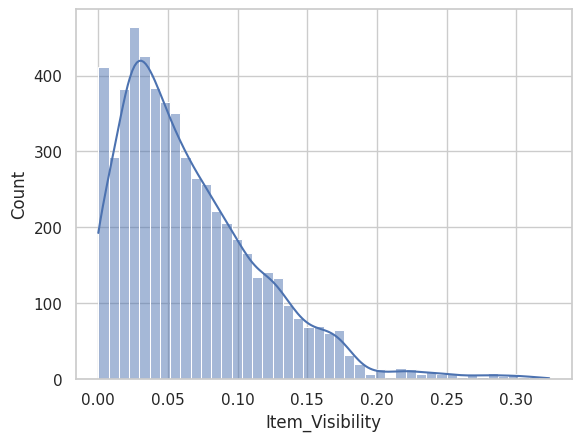

In [64]:
med_vis=test_df['Item_Visibility'].median()
mean_vis=test_df['Item_Visibility'].mean()

print('median', med_vis)
print("mean", mean_vis)
sns.histplot(x=test_df['Item_Visibility'],kde=True, data=test_df)

In [65]:
#we will impute them with median because the skeweness of distribution
rounded_median = round(med_vis, 7)
test_df['Item_Visibility'] = test_df['Item_Visibility'].replace(0, rounded_median)
#Check
test_df[test_df['Item_Visibility']==0]
value_to_count=0
(test_df['Item_Visibility']== value_to_count).sum()

0

In [66]:
q1=test_df['Item_Visibility'].quantile(0.25)
q3=test_df['Item_Visibility'].quantile(0.75)
iqr=q3-q1
#cut_off = iqr * 1.5
out=test_df[((test_df['Item_Visibility']<(q1-1.5*iqr)) | (test_df['Item_Visibility']>(q3+1.5*iqr)))]
print('Identified outliers: %d' % len(out))
out

Identified outliers: 134


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
19,FDA46,13.600,Low Fat,0.196898,Snack Foods,193.7136,OUT010,1998,Medium,Tier 3,Grocery Store
46,FDR14,11.650,Low Fat,0.291322,Dairy,55.8298,OUT010,1998,Medium,Tier 3,Grocery Store
76,FDV21,12.500,Low Fat,0.299544,Snack Foods,124.8704,OUT019,1985,Small,Tier 1,Grocery Store
78,DRP47,12.500,Low Fat,0.246178,Hard Drinks,252.4382,OUT019,1985,Small,Tier 1,Grocery Store
89,FDB03,17.750,Regular,0.262504,Dairy,242.2538,OUT010,1998,Medium,Tier 3,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...
5469,FDO27,6.175,Regular,0.299739,Meat,96.1752,OUT010,1998,Medium,Tier 3,Grocery Store
5482,FDO39,12.500,Regular,0.240512,Meat,181.9608,OUT019,1985,Small,Tier 1,Grocery Store
5514,DRJ25,14.600,Low Fat,0.252019,Soft Drinks,50.3692,OUT010,1998,Medium,Tier 3,Grocery Store
5571,FDI15,13.800,Low Fat,0.236595,Dairy,265.0884,OUT010,1998,Medium,Tier 3,Grocery Store


In [67]:
test_df['Outlet_Age']=2023- test_df['Outlet_Establishment_Year']
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,24
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,16
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,25
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,16
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,38


In [68]:
test_df =test_df.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'])
test_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1,24
1,8.300,reg,0.038428,Dairy,87.3198,Medium,Tier 2,Supermarket Type1,16
2,14.600,Low Fat,0.099575,Others,241.7538,Medium,Tier 3,Grocery Store,25
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,Medium,Tier 2,Supermarket Type1,16
4,12.500,Regular,0.118599,Dairy,234.2300,Medium,Tier 3,Supermarket Type3,38


In [69]:

enc = OneHotEncoder(sparse=False)
# Passing encoded columns
enc_col = pd.DataFrame(enc.fit_transform(test_df[['Item_Type']]))
enc_col.columns=enc.get_feature_names_out(['Item_Type'])
test_df=test_df.drop(columns=['Item_Type'])
# Merge with main
test_df =pd.concat([test_df,enc_col], axis=1)
test_df


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,20.750,Low Fat,0.007565,107.8622,Medium,Tier 1,Supermarket Type1,24,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,8.300,reg,0.038428,87.3198,Medium,Tier 2,Supermarket Type1,16,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14.600,Low Fat,0.099575,241.7538,Medium,Tier 3,Grocery Store,25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,7.315,Low Fat,0.015388,155.0340,Medium,Tier 2,Supermarket Type1,16,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,12.500,Regular,0.118599,234.2300,Medium,Tier 3,Supermarket Type3,38,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500,Regular,0.013496,141.3154,Small,Tier 1,Supermarket Type1,26,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5677,7.600,Regular,0.142991,169.1448,Medium,Tier 3,Supermarket Type2,14,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5678,10.000,Low Fat,0.073529,118.7440,Medium,Tier 2,Supermarket Type1,21,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5679,15.300,Regular,0.054154,214.6218,Medium,Tier 2,Supermarket Type1,16,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
test_df['Item_Fat_Content'] = labelencoder.fit_transform(test_df['Item_Fat_Content'])
test_df['Outlet_Size'] = labelencoder.fit_transform(test_df['Outlet_Size'])
test_df['Outlet_Type'] = labelencoder.fit_transform(test_df['Outlet_Type'])
test_df['Outlet_Location_Type'] = labelencoder.fit_transform(test_df['Outlet_Location_Type'])
test_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,20.750,1,0.007565,107.8622,1,0,1,24,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,8.300,4,0.038428,87.3198,1,1,1,16,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14.600,1,0.099575,241.7538,1,2,0,25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,7.315,1,0.015388,155.0340,1,1,1,16,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,12.500,2,0.118599,234.2300,1,2,3,38,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500,2,0.013496,141.3154,2,0,1,26,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5677,7.600,2,0.142991,169.1448,1,2,2,14,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5678,10.000,1,0.073529,118.7440,1,1,1,21,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5679,15.300,2,0.054154,214.6218,1,1,1,16,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
scaler = RobustScaler()
# Fit the scaler to the training data and transform it
test_df = scaler.fit_transform(test_df)

#**Prediction on test data**

In [73]:
# Transform the separate test data into polynomial features
X_test_poly = poly.transform(test_df)

# Make predictions on the test data using the trained Linear Regression model
pred_test = lm.predict(X_test_poly)
pred_test

array([1.70375000e+03, 1.41676174e+16, 6.59000000e+02, ...,
       1.95940625e+03, 3.67800000e+03, 1.28050000e+03])

In [75]:

#Ridge Rigression Model
# Transform the separate test data into polynomial features
test_ridge = poly.transform(test_df)

# Make predictions on the test data using the trained Ridge regression model
pred_test_ridge = rr.predict(test_ridge)
pred_test_ridge

array([1690.62727425, 1906.23234718,  652.29620247, ..., 1948.39610775,
       3671.89659346, 1273.46877135])

In [77]:
#Random Forest Model
pred_test_rf_reg = model_rf_reg.predict(test_df)
pred_test_rf_reg

array([1640.58826685, 1339.36890102,  566.84997618, ..., 2042.43906339,
       3488.19538145, 1379.82109104])

In [79]:
#XGBOOSt
# Make predictions on the test data using the trained regularized XGBoost model
pred_test_xgb_reg = best_xgb_model_reg.predict(test_df)
pred_test_xgb_reg


array([1540.6124, 1402.6537,  602.3078, ..., 2086.5825, 3569.2375,
       1297.0116], dtype=float32)

#**Saving Models**

In [80]:
import joblib

# Save the trained Linear Regression model to a file
joblib.dump(lm, 'polynomial_regression_model.pkl')

['polynomial_regression_model.pkl']

In [81]:
# Save the trained Ridge regression model to a file
joblib.dump(rr, 'ridge_regression_model.pkl')

['ridge_regression_model.pkl']

In [83]:
# Save the trained Random Forest model to a file
joblib.dump(model_rf_reg, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [84]:
# Save the trained XGBoost model with optimized hyperparameters to a file
joblib.dump(best_xgb_model_reg, 'optimized_xgboost_model.pkl')


['optimized_xgboost_model.pkl']

In [85]:
# Save the trained Random Forest model with optimized hyperparameters to a file
joblib.dump(best_model_rf, 'optimized_random_forest_model.pkl')

['optimized_random_forest_model.pkl']

#**Downloading Saved Models to local Machine**

In [86]:


# Specify the file path of the file you want to download
file_path = 'optimized_xgboost_model.pkl'

# Use Colab's files.download to download the file
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [88]:


# Specify the file path of the file you want to download
file_path = 'optimized_random_forest_model.pkl'

# Use Colab's files.download to download the file
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [89]:


# Specify the file path of the file you want to download
file_path = 'random_forest_model.pkl'

# Use Colab's files.download to download the file
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [90]:


file_path = 'ridge_regression_model.pkl'

# Use Colab's files.download to download the file
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [91]:


# Specify the file path of the file you want to download
file_path = 'polynomial_regression_model.pkl'

# Use Colab's files.download to download the file
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>